## Terms for Use
Solvers are responsible for complying with all terms of use for the data sources they access.  All code in this document is provided using the [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/).  The examples have been tested using Python 3 but have not been tested under Python 2.  Note that data providers may have changed their APIs or data formats after this notebook was published.

### Boring Details
The code cells below set up the notebook environment and load necessary libraries

In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.style.use("seaborn-dark")
import os
import pandas as pd
GFC_HOME = os.path.abspath("../../..")
data_path = os.path.join(GFC_HOME, "data")

## Mexican Crime Statistics

The Mexican Government publishes crime reports periodically.  Some of the statistics are used as the basis for IFPs.  The data is found at https://www.gob.mx/sesnsp/acciones-y-programas/victimas-nueva-metodologia?state=published

### Example:  Homicides in Quintana Roo

In this example we will determine the monthly count of homicides in the Mexican state of Quintana Roo.  This data doesn't have a web API so it will need to be downloaded from the URL listed above.  To follow along, access the link labeled [Victimas 2015-2019](http://www.secretariadoejecutivo.gob.mx/docs/pdfs/nueva-metodologia/Estatal-V%C3%ADctimas-2015-2019_feb19.zip) and save the resulting Excel file locally.  Note that the downloaded file is in `xlsb` format which cannot be read into pandas directly so you should save it as `xls`, `xlsx` or even `csv`.  For convenience you may want to rename it, as I did below.

In [3]:
MX_FILENAME = "Mexican Crime Victims Through February 2019.xlsx"
_path = os.path.join(data_path, MX_FILENAME)
mx_df = pd.read_excel(_path)
mx_df.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo,Rango de edad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Mujer,Menores de edad (0-17),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are a few columns of interest but they are named in Spanish.  Specifically, we are interested in:

- **Año**: the year
- **Entidad**: the state of interest.
- **Tipo de delito**: the type of crime
- **Enero, Febrero, Marzo, Abril, Mayo, Junio, Julio, Agosto, Septiembre, Octubre, Noviembre, Diciembre**: the months of the year

Notice that this data isn't "tidy" in the sense that each row really corresponds to 12 records, one per month.  It's going to be hard to construct time series out of the data frame as it is.

The first processing step is to filter the data to only include homicides in Quintana Roo.  After we do that filter we can drop the columns for **Clave_Ent** and **Entidad**, as they will all have the same value.

In [4]:
STATE_NAME = "Quintana Roo"
CRIME_TYPE = "Homicidio"
qr_df = mx_df[mx_df["Entidad"]==STATE_NAME]
qr_homicide_df = qr_df[qr_df["Tipo de delito"]==CRIME_TYPE]
qr_homicide_df.drop(["Clave_Ent", "Entidad"], axis=1, inplace=True)
qr_homicide_df.head()

/Users/peterhaglich/anaconda/envs/hfc/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Año,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo,Rango de edad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
5060,2015,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5061,2015,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5062,2015,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5063,2015,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5064,2015,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The next step is to melt the dataframe by converting the month columns so that we have a single variable for count and a field column for the month.  We can do this using the [pandas `melt` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html).

In [5]:
es_months = qr_homicide_df.columns[-12:]
_id_vars = qr_homicide_df.columns[:12]
qr_homicide_df = qr_homicide_df.melt(id_vars=["Año", "Tipo de delito", "Subtipo de delito", "Modalidad", "Sexo", "Rango de edad"], 
                                      value_vars=es_months, value_name="Count", var_name="Month")
print("There were {:.0f} reported homicides in {}".format(qr_homicide_df["Count"].sum(), STATE_NAME))
qr_homicide_df.head()

There were 2613 reported homicides in Quintana Roo


,Año,Tipo de delito,Subtipo de delito,Modalidad,Sexo,Rango de edad,Month,Count
0,2015,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),Enero,0.0
1,2015,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),Enero,0.0
2,2015,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),Enero,0.0
3,2015,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),Enero,0.0
4,2015,Homicidio,Homicidio culposo,Con arma de fuego,Mujer,Menores de edad (0-17),Enero,0.0


This data is already in a more useful format.  For example, if to see how many homicides there were by calendar month you can use a groupby function

In [6]:
qr_homicides_by_month = qr_homicide_df.groupby("Month").apply(lambda x: sum(x["Count"]))
qr_homicides_by_month

Month
Abril           NaN
Agosto          NaN
Diciembre       NaN
Enero         319.0
Febrero       275.0
Julio           NaN
Junio           NaN
Marzo           NaN
Mayo            NaN
Noviembre       NaN
Octubre         NaN
Septiembre      NaN
dtype: float64

Hold on, that didn't work.  We shouldn't have `NaN` values at all.  After inspection this is caused by the absence of reports after February 2019.  We need to remove the rows with counts of `NaN` for our groupby to work.  If we do this we should also probably take the mean value, as some months (Enero, Febrero) will have more reports than others.  

After filtering and taking the mean we can create a horizontal bar plot of the mean homicides per month.

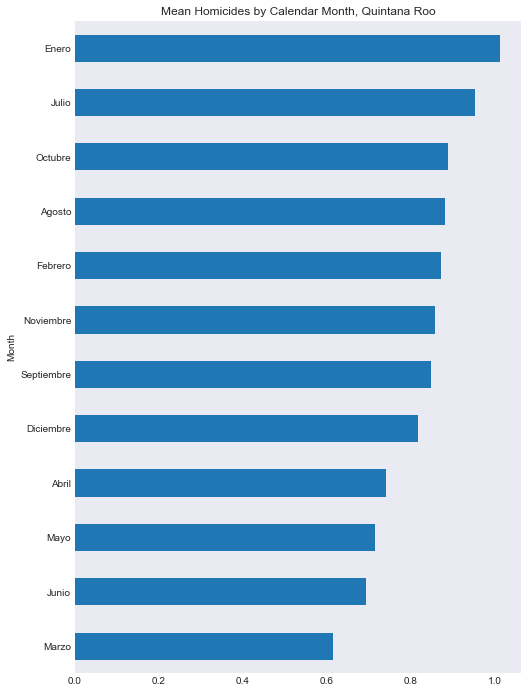

In [7]:
qr_homicide_df = qr_homicide_df[~pd.isnull(qr_homicide_df["Count"])]
qr_homicides_by_month = qr_homicide_df.groupby("Month").apply(lambda x: x["Count"].mean())
qr_homicides_by_month.sort_values().plot(kind="barh", 
                                         figsize=(8,12),
                                         title="Mean Homicides by Calendar Month, {}".format(STATE_NAME));

Other things to try are converting the year and month columns to calendar dates so as to obtain a time series of the crime statistics.